# Getting Started in TensorFlow
## A look at a very simple neural network in TensorFlow

This is an introduction to working with TensorFlow. It works through an example of a very simple neural network, walking through the steps of setting up the input, adding operators, setting up gradient descent, and running the computation graph. 

This tutorial presumes some familiarity with the TensorFlow computational model, which is introduced in the [Hello, TensorFlow](../notebooks/1_hello_tensorflow.ipynb) notebook, also available in this bundle.

## A simple neural network

Let's start with code. We're going to construct a very simple neural network computing a linear regression between two variables, y and x. The function it tries to compute is the best $w_1$ and $w_2$ it can find for the function $y = w_2 x + w_1$ for the data. The data we're going to give it is toy data, linear perturbed with random noise.

This is what the network looks like:

C:\Anaconda2\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:5: DeprecationWarning: decodestring() is a deprecated alias, use decodebytes()


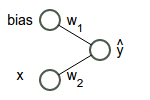

In [1]:
from __future__ import print_function

from IPython.display import Image
import base64
Image(data=base64.decodestring("iVBORw0KGgoAAAANSUhEUgAAAJYAAABkCAYAAABkW8nwAAAO90lEQVR4Xu2dT5Dc1J3Hv+YQT8VJZUhVdprLWs4FTSrGGv4ql9CuHBCH4GaTFCLZwnIcjOAy8l6Q/1SlU4XHcg6xJgtY2OOik2KxSGoTGWrXzYFC2T2MDAtWitRavmQ0e9k2SYGowom4hNRPtqA9TE+rW3/cPfPepcfup6f3fu/Tv9/T+/PVpo8//vhjsMQsULAFNjGwCrYoKy6xAAOLgVCKBRhYpZiVFcrAYgyUYgEGVilmZYUysBgDpViAgVWKWVmhDCzGQCkWGEuwrly5gtf++zW887/vYOn/lnD5T5cT40x9ZQrb/nEbxDtFiHeI2LJlSylGY4X2t8BYgUVAvfzqy3i5/TI+vPLhmq37wpYv4AHpATxw3wMMsP4cFJ5jbMAiqA4eOYg/Lv8xMcL26e34+vTXk8+vbv1q8n/03TsX38EfLv4h+aRE380dmmNwFY7O2gWOBVgE1Y/2/yjxUls+vwXaY1oS7tZK3v94MJ8zceUvV0Dea+H4AoOrQrhGHqxuT0Xjp0P7D2HqH6Yymejyu5dx5PiRZBxGnmt+bj7TdSxTfgv0ASuAzglwmyE8pfbZu3VaEDkDdT+AweevzGolvPjvL+LMb84knmr+yHxmqNKyCK7ZQ7OJ5yIo+3m6clqx8UrNB1bso2W64FQN9cnijdcdAvNAQWGRPBcLicX3Ua8S84FVcj3PnjuLhRcWkgH63OG5XHc7+NTBZEBP47NvffNbucpiF/e3QCaw2g0NfNvES5c+wtQ9u2G0LCj8BLAiFEaeBU0zYJ9fxkfYjKl7FZgtCzIHIA7QUmXov/g9LmMztt6rwLBMyFROj3TkZ0fgveXh4X96GN//zvf7t2aNHGlI7VlW0pYmRC+AKUwAsQu5thOuvIjQEjGBGJ7CQYptdOw6etc6VzXXzcUZwJrGseWt2P28DV2I4OgyDgQKFgMTYtQ1xqq10eDuR6j8Fi1NxGTkwpAfRos7h05bQscQIFgibEeHMBHCVhs4EBtY8lQQd6ulvbN78e6f302mC7Z/bXsuo9NkKk1X9PZ+IUyeR0sN4GscYl8DPzOP5VuPYynQwMU+dL4O3wzRbpQQ93O1bvQuzgRWS0p/tQA6Nuqcilq7A5u3Px28T7qw7BB1VUHqhEKTB2+pCAIVHZVD3dPgujpE6peOBzesQRS5nr/+b//g24nF7JN27qkCGq/J++RknHXm5JlVeiKGr/MQPQMdV0ZkCRBbNUwEMYzQhRyZEHgHOv29ynPM6HXtja1Rf7B4AZ7RgZv+SuMAOj+NtrYEX3avfyqMfDi2DdcLEAQBvPOX8MGtR3Ex0MEFJiRxP373wWZsvaeBhixDVRrg1/jxlwEWPV3ap+xVrR57Cjgpht2xEDV4mLIFvqkiaoUwwzp4U4Hv9/awN7YrR+vuGcAS4ZsdtKV0VNEFVqMLrIkWJGEPPP4hKA0RgiCAc1XsdJQErGQ2Ig7hOQ5sx4Hz0u+wvHX2akjtMWCpNhQCiCicq+AcCx1Fh9B2IegcNN6B4Teg1z0EeknzKqPFRe7a9AeLm4ajXvzUoJEDqUahMESrKxSqbQHbDBGLoXUNlBiuUsNOT8fFQEVsNdHmdOjStTgSGOCnLTQuBDBosLxKqnTwntw/glPnoHMS4E6iFVjgbBGcwUGMPAjtawP73GZf/wVkAutYtAvPezYUPoKjipBdGZ5vQOgavGteHbfsiXD09TZUIUbg6JD3vITlrU/iYthErPOYaQk44ZhocDF8U0HDqsEOHfQaC7/2X68lyzJVTjd0WiJu2XMem++7+tAxSd52+hguTe3GYtjq6V3XPyqDtbA/WLyAtqRg0rHhLceo3avCsk0kjqd7uoEL0FJkaC/9Hh/gS9ixS0dTCaDKHVidNhoTNN2gQP/FedAmly/t2IWm2YK2xswqDbj3antzz5oToD/915/i5smbcdo8vfaDQGiC37YfEyeW4KtcMu2g1HbCrp9Dx5Fw3ZCw04ZSb0Jse6CsLH1qgZFfK0znn+hpznzKHGpJRzus4YJ/AX/78G94ofUC7r777pwMxAhdE6pyAK8u78CJJZ+BtcKiIw8Wea0DTx34ZCH5oHYwM1y0TjhnziXbaWgB+4cP/RCPPfYYtm/fjpMnT+Kmm24aDrDYhdpoQdAbaMtNSB4Da6UhRx4sqnB3SCTPNbtvtu9iMoU/Wg5Kt9p0h8DTp09j3759ePrpp/H4448PB1fylOtC5jTUGVifseFYgJXClXou+jcN6Gk2nj7JG1Gi7TG0Hkiz7OlGP/ru6OGjq46rnnjiCSwuLibe66677hocMAZWT5uNDVgpXGfbZ5OtybQNZq1EE6G0NXmXtGvNwbrv+4n3uu222wYPjwys9QFW2goKjbQ4Tdth6CAFeSpK5J3oQMUwhynS8PjMM89AVdVs3ouBtb7Aytbrw+WiMZfnednCIwOLgTUIZml43LFjB5577rnhnx4Huek6yztWY6yqbb+wsJBMTwwUHquu5Ijej4GVoWMoPJ4/fz7xXkM9PWa4x3rLwsDK2KMXLlxIvBeFR5qe2LRpU8YrN2Y2BtaA/U7hkaYnnn322exPjwPeYz1kZ2AN2YtpeCTvdeeddw5Zyvq9jIGVo28pPJL3ok2NLDxeb0gGVg6w0kvT8HjixIlkHJY1lauaE8GRangwsvD/noKqt+kzsLJSkCEfzdi/8cYbifdaKzxWoppDmxJ5FT54NH06YZShAQVmYWAVaEwqKg2PMzMzyfTEyqfHqlRzAoOH6OqwJnXoNQeBSWcjq0sMrJJsferUqSQsdofHylRzYg8aLyG0QtiTOvhGhFZglyKD0Mt8DKySwEqLpfD45ptvYn5+Hr/+z19/sukwj2pOP72vyJXBy4BNME340Pg6AiNAu8IDkQysksGi4t9++2189wffxee++DkIO4TcqjlrSw504Eg81FobYetq+KOwKDgagjVOnRdtBgZW0RZdpbw0BL73/nv4yZM/6bv7tVeVxkk1h4FVAVgbUTWHgVUBWGUcvCVV6EP/cuiztQ9NCNsMiIshrPSIeaK3oUNIlXQqaDMDqwIjlyEV0Fv6MoQlbENT/FTIhWSXOF2AF5jocei8cCswsAo36WcLLEPchO7yyr+9smrt6TQ3geQmcgcd2CQbIHoIDKGyuSwG1joEi06oU+jj3RAWR2HQgFiiTuxqJmRgVQBWGaGQDo78/OjPe9T+qpfSeBeeqIM3JPip4k8F7aVbMLAqMHSlg/dr7YkcCZxWg1Jz0G5UL7/EwKoArBuhmoNEbupBvPrRDhxf8qFVLFrCwKoArFQi4P3o/VwTpCmgdBi3r2oOIrQbNdwfGljytZ46r2U1n4FVlmW7yn3rrbfwvX/+XrKkMyPM5FLNIS2KbCrSNI8loKX48G6AxhIDq2SwaIcDgWWaJn71H78qRDWnlxbF1aaQxJILj6TRjRhm0L4hYrwMrJLAos1+BBXtyaLty5SKVs1Zverx1RB4dhIPPe/CVioeXF2rFAOrYLDIOxFQd9xxRwLVytSt90XfFaGaU3ATCimOgVWIGa8WkoY9AorA6pUIrqJVcwpsRiFFMbAKMONqYS9LsWWo5mS5bxV5GFg5rExhj8ZPdHBitbCXo+ixv5SBNWQXpmGPvNXtt98+ZCnr9zIG1oB9O2zYG/A2Y5+dgZWxC1nYy2goNt2Q3VA0jqIDESzsZbcZ81hr2CoNe/T56KOPZrcqy8m2zazGAAt7+X8ZzGOtsCELe/mhohLGEqwyVFpY2CsGqLSUsQKrDJUWFvaKBWrswCpDpYWFvXKgKiYUxh5U/huwhd8idBqYRARX4bHTldd8Le8gTSpapYWWX0is47qnveTdi02I6aFOejlAbSdcOT2fF8NTOEixDTqnV6Uk0CC2GpW8hYTCyFXA72yj8XoAAzoE+nsxgNnrZc8DtL7bU9HJlDwqLY9855FkbY8ktS3LWlGLECbPo6UG8DUOsa+Bn5nH8q3HsRRo4GISL6vDN0O0e70SdoB2rfeshYBF71Juyzzu90TcF59FIC8WJvSVvgiT9nnPH5nP/K7CtOPonYWzh2aTF2Fu+usmvPjLF3us7cXwdR6iZ6DjyogsAWKrhokghhG6kCMTAu9Ap7+r1l0cQwoLAote4+ugwT+IsxO78XrQKkTkqzsEkqeily8Nk0il5cfHfowv3/xlLBxf6Pk2sNhTwEkx7I6FqMHDlC3wTRVRK4QZ1sGbCnxfrfxgwjBtvtHXFAZW7OsQZo7hEm7Fkxf8nm+mH6TBlau0RG00OBWcY6Gj6BDaLgSdDn46MPwG9Hr15/MGsdco5S0GrDiAIU7D5M/AgIo9gY6Lng4+5wi3jIOea59wieCQzgEnAe4kWoEFzhbBGRzEyIPQDmBWpaoxSpQMUZdCwCLh1OlmDWcCBzJsSNzDiIyL8LR8Ur1lHE2nPeZzh+d6mooENW7Zcx6b7zuHTlvCJB1Nnz6GS1O7sUhKxDl/LEP00Vhekh8sUjThNUyYAdxr59dCSwSvAWbg5Xq7exkqLfRO6TMnz/TurNAEv20/Jk4swaf2xC6U2k7Y9XPoOBIm6crYh6UoaLodABOoSU3YlpLbQ48lQT0qnR+sEq1RBlj0dGmfsnPVOtB51IMmfEdGLQ7RkkSYkps8VbJ01QIjDdaNCIVZwOi4DnxOgsRRXIzhazwakY3gmphsljLWe56RBqv6wfvg3R0HFqS6CcHxC5kQHrwGo3nFSIN1Q1RaBuinyDchSyYmDRcthWPLPF22G2mwuo+k55kgHUylJRtZoa1A0kI0bAdGPRnSszQuYFE90yUdepoznzKHWtLRDmsglZY8cHZTE7UVCGqEpmtDScZZLK20wEh7LKpst9YBKQUf1A5mhovWCefMuU9eM9JbWnEQMAIY/DQOXLr+mqmHXkfIdj18YpSRByuFa6+2F1f+cgXkuWb3zfZdN6Twt/DCQuKpsgmVDQIXy9vPAmMB1krPRf9eryot/TpsXL4fG7BSuNa7Ssu4gNOvnmMFVtqY9azS0q/DxuX7sQRrXIy7kevJwNrIvV9i2xlYJRp3IxfNwNrIvV9i2xlYJRp3IxfNwNrIvV9i2xlYJRp3IxfNwNrIvV9i2xlYJRp3Ixf9d0NIelzdt4X5AAAAAElFTkSuQmCC".encode('utf-8')), embed=True)

Here is the TensorFlow code for this simple neural network and the results of running this code:

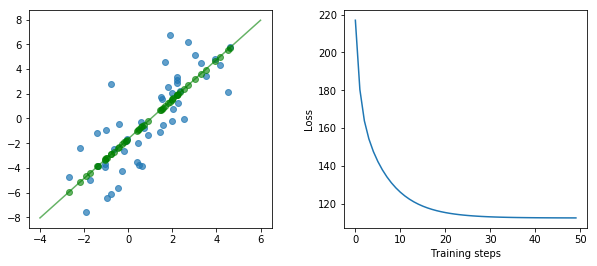

In [2]:
#@test {"output": "ignore"}
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from pkg_resources import parse_version

%matplotlib inline

# Set up the data with a noisy linear relationship between X and Y.
num_examples = 50
X = np.array([np.linspace(-2, 4, num_examples), np.linspace(-6, 6, num_examples)])
X += np.random.randn(2, num_examples)
x, y = X
x_with_bias = np.array([(1., a) for a in x]).astype(np.float32)

losses = []
training_steps = 50
learning_rate = 0.002

with tf.Session() as sess:
    # Set up all the tensors, variables, and operations.
    input = tf.constant(x_with_bias)
    target = tf.constant(np.transpose([y]).astype(np.float32))
    weights = tf.Variable(tf.random_normal([2, 1], 0, 0.1))

    if parse_version(tf.__version__) >= parse_version('0.12'):
        tf.global_variables_initializer().run()
    else:
        tf.initialize_all_variables().run()

    yhat = tf.matmul(input, weights)
    yerror = tf.subtract(yhat, target)
    loss = tf.nn.l2_loss(yerror)
  
    update_weights = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
  
    for _ in range(training_steps):
        # Repeatedly run the operations, updating the TensorFlow variable.
        update_weights.run()
        losses.append(loss.eval())

    # Training is done, get the final values for the graphs
    betas = weights.eval()
    yhat = yhat.eval()

# Show the fit and the loss over time.
fig, (ax1, ax2) = plt.subplots(1, 2)
plt.subplots_adjust(wspace=.3)
fig.set_size_inches(10, 4)
ax1.scatter(x, y, alpha=.7)
ax1.scatter(x, np.transpose(yhat)[0], c="g", alpha=.6)
line_x_range = (-4, 6)
ax1.plot(line_x_range, [betas[0] + a * betas[1] for a in line_x_range], "g", alpha=0.6)
ax2.plot(range(0, training_steps), losses)
ax2.set_ylabel("Loss")
ax2.set_xlabel("Training steps")
plt.show()

In the remainder of this notebook, we'll go through this example in more detail.

## From the beginning

Let's walk through exactly what this is doing from the beginning. We'll start with what the data looks like, then we'll look at this neural network, what is executed when, what gradient descent is doing, and how it all works together.

## The data

This is a toy data set here. We have 50 (x,y) data points. At first, the data is perfectly linear.

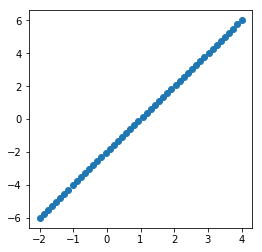

In [3]:
#@test {"output": "ignore"}
num_examples = 50
X = np.array([np.linspace(-2, 4, num_examples), np.linspace(-6, 6, num_examples)])
plt.figure(figsize=(4,4))
plt.scatter(X[0], X[1])
plt.show()

Then we perturb it with noise:

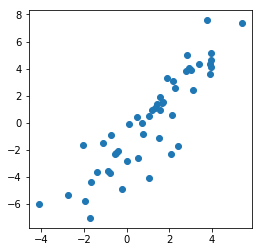

In [4]:
#@test {"output": "ignore"}
X += np.random.randn(2, num_examples)
plt.figure(figsize=(4,4))
plt.scatter(X[0], X[1])
plt.show()

## What we want to do

What we're trying to do is calculate the green line below:

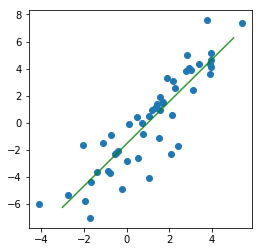

In [5]:
#@test {"output": "ignore"}
weights = np.polyfit(X[0], X[1], 1)
plt.figure(figsize=(4,4))
plt.scatter(X[0], X[1])
line_x_range = (-3, 5)
plt.plot(line_x_range, [weights[1] + a * weights[0] for a in line_x_range], "g", alpha=0.8)
plt.show()

Remember that our simple network looks like this:

C:\Anaconda2\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:3: DeprecationWarning: decodestring() is a deprecated alias, use decodebytes()
  app.launch_new_instance()


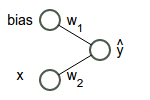

In [6]:
from IPython.display import Image
import base64
Image(data=base64.decodestring("iVBORw0KGgoAAAANSUhEUgAAAJYAAABkCAYAAABkW8nwAAAO90lEQVR4Xu2dT5Dc1J3Hv+YQT8VJZUhVdprLWs4FTSrGGv4ql9CuHBCH4GaTFCLZwnIcjOAy8l6Q/1SlU4XHcg6xJgtY2OOik2KxSGoTGWrXzYFC2T2MDAtWitRavmQ0e9k2SYGowom4hNRPtqA9TE+rW3/cPfPepcfup6f3fu/Tv9/T+/PVpo8//vhjsMQsULAFNjGwCrYoKy6xAAOLgVCKBRhYpZiVFcrAYgyUYgEGVilmZYUysBgDpViAgVWKWVmhDCzGQCkWGEuwrly5gtf++zW887/vYOn/lnD5T5cT40x9ZQrb/nEbxDtFiHeI2LJlSylGY4X2t8BYgUVAvfzqy3i5/TI+vPLhmq37wpYv4AHpATxw3wMMsP4cFJ5jbMAiqA4eOYg/Lv8xMcL26e34+vTXk8+vbv1q8n/03TsX38EfLv4h+aRE380dmmNwFY7O2gWOBVgE1Y/2/yjxUls+vwXaY1oS7tZK3v94MJ8zceUvV0Dea+H4AoOrQrhGHqxuT0Xjp0P7D2HqH6Yymejyu5dx5PiRZBxGnmt+bj7TdSxTfgv0ASuAzglwmyE8pfbZu3VaEDkDdT+AweevzGolvPjvL+LMb84knmr+yHxmqNKyCK7ZQ7OJ5yIo+3m6clqx8UrNB1bso2W64FQN9cnijdcdAvNAQWGRPBcLicX3Ua8S84FVcj3PnjuLhRcWkgH63OG5XHc7+NTBZEBP47NvffNbucpiF/e3QCaw2g0NfNvES5c+wtQ9u2G0LCj8BLAiFEaeBU0zYJ9fxkfYjKl7FZgtCzIHIA7QUmXov/g9LmMztt6rwLBMyFROj3TkZ0fgveXh4X96GN//zvf7t2aNHGlI7VlW0pYmRC+AKUwAsQu5thOuvIjQEjGBGJ7CQYptdOw6etc6VzXXzcUZwJrGseWt2P28DV2I4OgyDgQKFgMTYtQ1xqq10eDuR6j8Fi1NxGTkwpAfRos7h05bQscQIFgibEeHMBHCVhs4EBtY8lQQd6ulvbN78e6f302mC7Z/bXsuo9NkKk1X9PZ+IUyeR0sN4GscYl8DPzOP5VuPYynQwMU+dL4O3wzRbpQQ93O1bvQuzgRWS0p/tQA6Nuqcilq7A5u3Px28T7qw7BB1VUHqhEKTB2+pCAIVHZVD3dPgujpE6peOBzesQRS5nr/+b//g24nF7JN27qkCGq/J++RknHXm5JlVeiKGr/MQPQMdV0ZkCRBbNUwEMYzQhRyZEHgHOv29ynPM6HXtja1Rf7B4AZ7RgZv+SuMAOj+NtrYEX3avfyqMfDi2DdcLEAQBvPOX8MGtR3Ex0MEFJiRxP373wWZsvaeBhixDVRrg1/jxlwEWPV3ap+xVrR57Cjgpht2xEDV4mLIFvqkiaoUwwzp4U4Hv9/awN7YrR+vuGcAS4ZsdtKV0VNEFVqMLrIkWJGEPPP4hKA0RgiCAc1XsdJQErGQ2Ig7hOQ5sx4Hz0u+wvHX2akjtMWCpNhQCiCicq+AcCx1Fh9B2IegcNN6B4Teg1z0EeknzKqPFRe7a9AeLm4ajXvzUoJEDqUahMESrKxSqbQHbDBGLoXUNlBiuUsNOT8fFQEVsNdHmdOjStTgSGOCnLTQuBDBosLxKqnTwntw/glPnoHMS4E6iFVjgbBGcwUGMPAjtawP73GZf/wVkAutYtAvPezYUPoKjipBdGZ5vQOgavGteHbfsiXD09TZUIUbg6JD3vITlrU/iYthErPOYaQk44ZhocDF8U0HDqsEOHfQaC7/2X68lyzJVTjd0WiJu2XMem++7+tAxSd52+hguTe3GYtjq6V3XPyqDtbA/WLyAtqRg0rHhLceo3avCsk0kjqd7uoEL0FJkaC/9Hh/gS9ixS0dTCaDKHVidNhoTNN2gQP/FedAmly/t2IWm2YK2xswqDbj3antzz5oToD/915/i5smbcdo8vfaDQGiC37YfEyeW4KtcMu2g1HbCrp9Dx5Fw3ZCw04ZSb0Jse6CsLH1qgZFfK0znn+hpznzKHGpJRzus4YJ/AX/78G94ofUC7r777pwMxAhdE6pyAK8u78CJJZ+BtcKiIw8Wea0DTx34ZCH5oHYwM1y0TjhnziXbaWgB+4cP/RCPPfYYtm/fjpMnT+Kmm24aDrDYhdpoQdAbaMtNSB4Da6UhRx4sqnB3SCTPNbtvtu9iMoU/Wg5Kt9p0h8DTp09j3759ePrpp/H4448PB1fylOtC5jTUGVifseFYgJXClXou+jcN6Gk2nj7JG1Gi7TG0Hkiz7OlGP/ru6OGjq46rnnjiCSwuLibe66677hocMAZWT5uNDVgpXGfbZ5OtybQNZq1EE6G0NXmXtGvNwbrv+4n3uu222wYPjwys9QFW2goKjbQ4Tdth6CAFeSpK5J3oQMUwhynS8PjMM89AVdVs3ouBtb7Aytbrw+WiMZfnednCIwOLgTUIZml43LFjB5577rnhnx4Huek6yztWY6yqbb+wsJBMTwwUHquu5Ijej4GVoWMoPJ4/fz7xXkM9PWa4x3rLwsDK2KMXLlxIvBeFR5qe2LRpU8YrN2Y2BtaA/U7hkaYnnn322exPjwPeYz1kZ2AN2YtpeCTvdeeddw5Zyvq9jIGVo28pPJL3ok2NLDxeb0gGVg6w0kvT8HjixIlkHJY1lauaE8GRangwsvD/noKqt+kzsLJSkCEfzdi/8cYbifdaKzxWoppDmxJ5FT54NH06YZShAQVmYWAVaEwqKg2PMzMzyfTEyqfHqlRzAoOH6OqwJnXoNQeBSWcjq0sMrJJsferUqSQsdofHylRzYg8aLyG0QtiTOvhGhFZglyKD0Mt8DKySwEqLpfD45ptvYn5+Hr/+z19/sukwj2pOP72vyJXBy4BNME340Pg6AiNAu8IDkQysksGi4t9++2189wffxee++DkIO4TcqjlrSw504Eg81FobYetq+KOwKDgagjVOnRdtBgZW0RZdpbw0BL73/nv4yZM/6bv7tVeVxkk1h4FVAVgbUTWHgVUBWGUcvCVV6EP/cuiztQ9NCNsMiIshrPSIeaK3oUNIlXQqaDMDqwIjlyEV0Fv6MoQlbENT/FTIhWSXOF2AF5jocei8cCswsAo36WcLLEPchO7yyr+9smrt6TQ3geQmcgcd2CQbIHoIDKGyuSwG1joEi06oU+jj3RAWR2HQgFiiTuxqJmRgVQBWGaGQDo78/OjPe9T+qpfSeBeeqIM3JPip4k8F7aVbMLAqMHSlg/dr7YkcCZxWg1Jz0G5UL7/EwKoArBuhmoNEbupBvPrRDhxf8qFVLFrCwKoArFQi4P3o/VwTpCmgdBi3r2oOIrQbNdwfGljytZ46r2U1n4FVlmW7yn3rrbfwvX/+XrKkMyPM5FLNIS2KbCrSNI8loKX48G6AxhIDq2SwaIcDgWWaJn71H78qRDWnlxbF1aaQxJILj6TRjRhm0L4hYrwMrJLAos1+BBXtyaLty5SKVs1Zverx1RB4dhIPPe/CVioeXF2rFAOrYLDIOxFQd9xxRwLVytSt90XfFaGaU3ATCimOgVWIGa8WkoY9AorA6pUIrqJVcwpsRiFFMbAKMONqYS9LsWWo5mS5bxV5GFg5rExhj8ZPdHBitbCXo+ixv5SBNWQXpmGPvNXtt98+ZCnr9zIG1oB9O2zYG/A2Y5+dgZWxC1nYy2goNt2Q3VA0jqIDESzsZbcZ81hr2CoNe/T56KOPZrcqy8m2zazGAAt7+X8ZzGOtsCELe/mhohLGEqwyVFpY2CsGqLSUsQKrDJUWFvaKBWrswCpDpYWFvXKgKiYUxh5U/huwhd8idBqYRARX4bHTldd8Le8gTSpapYWWX0is47qnveTdi02I6aFOejlAbSdcOT2fF8NTOEixDTqnV6Uk0CC2GpW8hYTCyFXA72yj8XoAAzoE+nsxgNnrZc8DtL7bU9HJlDwqLY9855FkbY8ktS3LWlGLECbPo6UG8DUOsa+Bn5nH8q3HsRRo4GISL6vDN0O0e70SdoB2rfeshYBF71Juyzzu90TcF59FIC8WJvSVvgiT9nnPH5nP/K7CtOPonYWzh2aTF2Fu+usmvPjLF3us7cXwdR6iZ6DjyogsAWKrhokghhG6kCMTAu9Ap7+r1l0cQwoLAote4+ugwT+IsxO78XrQKkTkqzsEkqeily8Nk0il5cfHfowv3/xlLBxf6Pk2sNhTwEkx7I6FqMHDlC3wTRVRK4QZ1sGbCnxfrfxgwjBtvtHXFAZW7OsQZo7hEm7Fkxf8nm+mH6TBlau0RG00OBWcY6Gj6BDaLgSdDn46MPwG9Hr15/MGsdco5S0GrDiAIU7D5M/AgIo9gY6Lng4+5wi3jIOea59wieCQzgEnAe4kWoEFzhbBGRzEyIPQDmBWpaoxSpQMUZdCwCLh1OlmDWcCBzJsSNzDiIyL8LR8Ur1lHE2nPeZzh+d6mooENW7Zcx6b7zuHTlvCJB1Nnz6GS1O7sUhKxDl/LEP00Vhekh8sUjThNUyYAdxr59dCSwSvAWbg5Xq7exkqLfRO6TMnz/TurNAEv20/Jk4swaf2xC6U2k7Y9XPoOBIm6crYh6UoaLodABOoSU3YlpLbQ48lQT0qnR+sEq1RBlj0dGmfsnPVOtB51IMmfEdGLQ7RkkSYkps8VbJ01QIjDdaNCIVZwOi4DnxOgsRRXIzhazwakY3gmphsljLWe56RBqv6wfvg3R0HFqS6CcHxC5kQHrwGo3nFSIN1Q1RaBuinyDchSyYmDRcthWPLPF22G2mwuo+k55kgHUylJRtZoa1A0kI0bAdGPRnSszQuYFE90yUdepoznzKHWtLRDmsglZY8cHZTE7UVCGqEpmtDScZZLK20wEh7LKpst9YBKQUf1A5mhovWCefMuU9eM9JbWnEQMAIY/DQOXLr+mqmHXkfIdj18YpSRByuFa6+2F1f+cgXkuWb3zfZdN6Twt/DCQuKpsgmVDQIXy9vPAmMB1krPRf9eryot/TpsXL4fG7BSuNa7Ssu4gNOvnmMFVtqY9azS0q/DxuX7sQRrXIy7kevJwNrIvV9i2xlYJRp3IxfNwNrIvV9i2xlYJRp3IxfNwNrIvV9i2xlYJRp3IxfNwNrIvV9i2xlYJRp3Ixf9d0NIelzdt4X5AAAAAElFTkSuQmCC".encode('utf-8')), embed=True)

That's equivalent to the function $\hat{y} = w_2 x + w_1$. What we're trying to do is find the "best" weights $w_1$ and $w_2$. That will give us that green regression line above.

What are the best weights? They're the weights that minimize the difference between our estimate $\hat{y}$ and the actual y. Specifically, we want to minimize the sum of the squared errors, so minimize $\sum{(\hat{y} - y)^2}$, which is known as the *L2 loss*. So, the best weights are the weights that minimize the L2 loss.

## Gradient descent

What gradient descent does is start with random weights for $\hat{y} = w_2 x + w_1$ and gradually moves those weights toward better values.

It does that by following the downward slope of the error curves. Imagine that the possible errors we could get with different weights as a landscape. From whatever weights we have, moving in some directions will increase the error, like going uphill, and some directions will decrease the error, like going downhill. We want to roll downhill, always moving the weights toward lower error.

How does gradient descent know which way is downhill? It follows the partial derivatives of the L2 loss. The partial derivative is like a velocity, saying which way the error will change if we change the weight. We want to move in the direction of lower error. The partial derivative points the way.

So, what gradient descent does is start with random weights and gradually walk those weights toward lower error, using the partial derivatives to know which direction to go.

## The code again

Let's go back to the code now, walking through it with many more comments in the code this time:

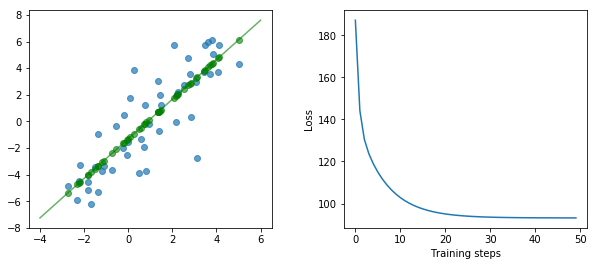

In [7]:
#@test {"output": "ignore"}
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Set up the data with a noisy linear relationship between X and Y.
num_examples = 50
X = np.array([np.linspace(-2, 4, num_examples), np.linspace(-6, 6, num_examples)])
# Add random noise (gaussian, mean 0, stdev 1)
X += np.random.randn(2, num_examples)
# Split into x and y
x, y = X
# Add the bias node which always has a value of 1
x_with_bias = np.array([(1., a) for a in x]).astype(np.float32)

# Keep track of the loss at each iteration so we can chart it later
losses = []
# How many iterations to run our training
training_steps = 50
# The learning rate. Also known has the step size. This changes how far
# we move down the gradient toward lower error at each step. Too large
# jumps risk inaccuracy, too small slow the learning.
learning_rate = 0.002

# In TensorFlow, we need to run everything in the context of a session.
with tf.Session() as sess:
    # Set up all the tensors.
    # Our input layer is the x value and the bias node.
    input = tf.constant(x_with_bias)
    # Our target is the y values. They need to be massaged to the right shape.
    target = tf.constant(np.transpose([y]).astype(np.float32))
    # Weights are a variable. They change every time through the loop.
    # Weights are initialized to random values (gaussian, mean 0, stdev 0.1)
    weights = tf.Variable(tf.random_normal([2, 1], 0, 0.1))

    # Initialize all the variables defined above.
    tf.global_variables_initializer().run()

    # Set up all operations that will run in the loop.
    # For all x values, generate our estimate on all y given our current
    # weights. So, this is computing y = w2 * x + w1 * bias
    yhat = tf.matmul(input, weights)
    # Compute the error, which is just the difference between our 
    # estimate of y and what y actually is.
    yerror = tf.subtract(yhat, target)
    # We are going to minimize the L2 loss. The L2 loss is the sum of the
    # squared error for all our estimates of y. This penalizes large errors
    # a lot, but small errors only a little.
    loss = tf.nn.l2_loss(yerror)

    # Perform gradient descent. 
    # This essentially just updates weights, like weights -= grads * learning_rate
    # using the partial derivative of the loss with respect to the
    # weights. It's the direction we want to go to move toward lower error.
    update_weights = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

    # At this point, we've defined all our tensors and run our initialization
    # operations. We've also set up the operations that will repeatedly be run
    # inside the training loop. All the training loop is going to do is 
    # repeatedly call run, inducing the gradient descent operation, which has the effect of
    # repeatedly changing weights by a small amount in the direction (the
    # partial derivative or gradient) that will reduce the error (the L2 loss).
    for _ in range(training_steps):
        # Repeatedly run the operations, updating the TensorFlow variable.
        sess.run(update_weights)

        # Here, we're keeping a history of the losses to plot later
        # so we can see the change in loss as training progresses.
        losses.append(loss.eval())

    # Training is done, get the final values for the charts
    betas = weights.eval()
    yhat = yhat.eval()

# Show the results.
fig, (ax1, ax2) = plt.subplots(1, 2)
plt.subplots_adjust(wspace=.3)
fig.set_size_inches(10, 4)
ax1.scatter(x, y, alpha=.7)
ax1.scatter(x, np.transpose(yhat)[0], c="g", alpha=.6)
line_x_range = (-4, 6)
ax1.plot(line_x_range, [betas[0] + a * betas[1] for a in line_x_range], "g", alpha=0.6)
ax2.plot(range(0, training_steps), losses)
ax2.set_ylabel("Loss")
ax2.set_xlabel("Training steps")
plt.show()

This version of the code has a lot more comments at each step. Read through the code and the comments.

The core piece is the loop, which contains a single `run` call. `run` executes the operations necessary for the `GradientDescentOptimizer` operation. That includes several other operations, all of which are also executed each time through the loop. The `GradientDescentOptimizer` execution has a side effect of assigning to weights, so the variable weights changes each time in the loop.

The result is that, in each iteration of the loop, the code processes the entire input data set, generates all the estimates $\hat{y}$ for each $x$ given the current weights $w_i$, finds all the errors and L2 losses $(\hat{y} - y)^2$, and then changes the weights $w_i$ by a small amount in the direction of that will reduce the L2 loss.

After many iterations of the loop, the amount we are changing the weights gets smaller and smaller, and the loss gets smaller and smaller, as we narrow in on near optimal values for the weights. By the end of the loop, we should be near the lowest possible values for the L2 loss, and near the best possible weights we could have.

## The details

This code works, but there are still a few black boxes that are worth diving into here. `l2_loss`? `GradientDescentOptimizer`? What exactly are those doing?

One way to understand exactly what those are doing is to do the same thing without using those functions. Here is equivalent code that calculates the gradients (derivatives), L2 loss (sum squared error), and `GradientDescentOptimizer` from scratch without using those functions.

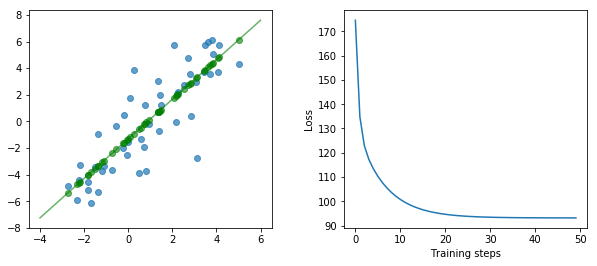

In [8]:
#@test {"output": "ignore"}

# Use the same input data and parameters as the examples above.
# We're going to build up a list of the errors over time as we train to display later.
losses = []

with tf.Session() as sess:
    # Set up all the tensors.
    # The input is the x values with the bias appended on to each x.
    input = tf.constant(x_with_bias)
    # We're trying to find the best fit for the target y values.
    target = tf.constant(np.transpose([y]).astype(np.float32))
    # Let's set up the weights randomly
    weights = tf.Variable(tf.random_normal([2, 1], 0, 0.1))

    tf.global_variables_initializer().run()

    # learning_rate is the step size, so how much we jump from the current spot
    learning_rate = 0.002

    # The operations in the operation graph.
    # Compute the predicted y values given our current weights
    yhat = tf.matmul(input, weights)
    # How much does this differ from the actual y?
    yerror = tf.subtract(yhat, target)
    # Change the weights by subtracting derivative with respect to that weight
    loss = 0.5 * tf.reduce_sum(tf.multiply(yerror, yerror))
    gradient = tf.reduce_sum(tf.transpose(tf.multiply(input, yerror)), 1, keep_dims=True)
    update_weights = tf.assign_sub(weights, learning_rate * gradient)
    
    # Repeatedly run the operation graph over the training data and weights.
    for _ in range(training_steps):
        sess.run(update_weights)
    
        # Here, we're keeping a history of the losses to plot later
        # so we can see the change in loss as training progresses.
        losses.append(loss.eval())

    # Training is done, compute final values for the graph.
    betas = weights.eval()
    yhat = yhat.eval()

# Show the results.
fig, (ax1, ax2) = plt.subplots(1, 2)
plt.subplots_adjust(wspace=.3)
fig.set_size_inches(10, 4)
ax1.scatter(x, y, alpha=.7)
ax1.scatter(x, np.transpose(yhat)[0], c="g", alpha=.6)
line_x_range = (-4, 6)
ax1.plot(line_x_range, [betas[0] + a * betas[1] for a in line_x_range], "g", alpha=0.6)
ax2.plot(range(0, training_steps), losses)
ax2.set_ylabel("Loss")
ax2.set_xlabel("Training steps")
plt.show()

This code looks very similar to the code above, but without using `l2_loss` or `GradientDescentOptimizer`. Let's look at exactly what it is doing instead.

This code is the key difference:

>`loss = 0.5 * tf.reduce_sum(tf.multiply(yerror, yerror))`

>`gradient = tf.reduce_sum(tf.transpose(tf.multiply(input, yerror)), 1, keep_dims=True)`

>`update_weights = tf.assign_sub(weights, learning_rate * gradient)`

The first line calculates the L2 loss manually. It's the same as `l2_loss(yerror)`, which is half of the sum of the squared error, so $\frac{1}{2} \sum (\hat{y} - y)^2$. With this code, you can see exactly what the `l2_loss` operation does. It's the total of all the squared differences between the target and our estimates. And minimizing the L2 loss will minimize how much our estimates of $y$ differ from the true values of $y$.

The second line calculates $\begin{bmatrix}\sum{(\hat{y} - y)*1} \\ \sum{(\hat{y} - y)*x_i}\end{bmatrix}$. What is that? It's the partial derivatives of the L2 loss with respect to $w_1$ and $w_2$, the same thing as what `gradients(loss, weights)` does in the earlier code. Not sure about that? Let's look at it in more detail. The gradient calculation is going to get the partial derivatives of loss with respect to each of the weights so we can change those weights in the direction that will reduce the loss. L2 loss is $\frac{1}{2} \sum (\hat{y} - y)^2$, where $\hat{y} = w_2 x + w_1$. So, using the chain rule and substituting in for $\hat{y}$ in the derivative, $\frac{\partial}{\partial w_2} = \sum{(\hat{y} - y)\, *x_i}$ and $\frac{\partial}{\partial w_1} = \sum{(\hat{y} - y)\, *1}$. `GradientDescentOptimizer` does these calculations automatically for you based on the graph structure.

The third line is equivalent to `weights -= learning_rate * gradient`, so it subtracts a constant the gradient after scaling by the learning rate (to avoid jumping too far each time, which risks moving in the wrong direction). It's also the same thing that `GradientDescentOptimizer(learning_rate).minimize(loss)` does in the earlier code. Gradient descent updates its first parameter based on the values in the second after scaling by the third, so it's equivalent to the `assign_sub(weights, learning_rate * gradient)`.

Hopefully, this other code gives you a better understanding of what the operations we used previously are actually doing. In practice, you'll want to use those high level operators most of the time rather than calculating things yourself. For this toy example and simple network, it's not too bad to compute and apply the gradients yourself from scratch, but things get more complicated with larger networks.